In [2]:
# Import library

import pandas as pd
import inventorize3 as inv

In [3]:
# Import data

retail = pd.read_csv("online_retail2.csv")
retail = retail.drop_duplicates().dropna(axis = 0)

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
Index: 797885 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      797885 non-null  object 
 1   StockCode    797885 non-null  object 
 2   Description  797885 non-null  object 
 3   Quantity     797885 non-null  int64  
 4   InvoiceDate  797885 non-null  object 
 5   Price        797885 non-null  float64
 6   Customer ID  797885 non-null  float64
 7   Country      797885 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 54.8+ MB


In [5]:
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
retail['date'] = retail['InvoiceDate'].dt.strftime('%Y-%m-%d')
retail['date'] = pd.to_datetime(retail['date'])

In [6]:
max_date = max(retail['date'])
max_date

Timestamp('2011-12-09 00:00:00')

In [7]:
# Filter last 4 months
last_four_month = retail[retail['date'] > '2011-08-01']
last_four_month

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date
812082,562032,23308,SET OF 60 VINTAGE LEAF CAKE CASES,24,2011-08-02 08:48:00,0.55,12347.0,Iceland,2011-08-02
812083,562032,23297,SET 40 HEART SHAPE PETIT FOUR CASES,16,2011-08-02 08:48:00,1.65,12347.0,Iceland,2011-08-02
812084,562032,22375,AIRLINE BAG VINTAGE JET SET BROWN,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,2011-08-02
812085,562032,22374,AIRLINE BAG VINTAGE JET SET RED,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,2011-08-02
812086,562032,22376,AIRLINE BAG VINTAGE JET SET WHITE,4,2011-08-02 08:48:00,4.25,12347.0,Iceland,2011-08-02
...,...,...,...,...,...,...,...,...,...
1067366,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-09
1067367,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
1067368,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-09
1067369,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,2011-12-09


In [8]:
last_four_month['revenue'] = last_four_month['Quantity'] * last_four_month['Price']

C:\Users\thanh\AppData\Local\Temp\ipykernel_22588\2225777786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_four_month['revenue'] = last_four_month['Quantity'] * last_four_month['Price']


In [9]:
a = last_four_month.groupby(by = ['date', 'Description']).agg(total_daily = ('Quantity', 'sum'), total_revenue = ('revenue', 'sum')).reset_index()

In [10]:
grouped = a.groupby('Description').agg(average_sales = ('total_daily', 'mean'), 
                                       sd = ('total_daily', 'std'),
                                       total_sales = ('total_daily', 'sum'), 
                                       total_revenue = ('total_revenue', 'sum')).reset_index()

In [11]:
abc_analysis = inv.productmix(skus = grouped['Description'],
                              sales = grouped['total_sales'],
                              revenue = grouped['total_revenue'])
abc_analysis['product_mix'].value_counts()

product_mix
C_C    1456
A_A     501
B_B     314
B_C     238
C_B     235
A_B     226
B_A     174
A_C      42
C_A      35
Name: count, dtype: int64

In [12]:
service_level_mapping = {'A_A':0.95, 'A_B':0.95, 'A_C':0.95,
           'B_A':0.7, 'B_B':0.7, 'B_C':0.75,
          'C_A':0.8, 'C_B':0.8, 'C_C':0.7}

In [13]:
abc_analysis['service_level'] = abc_analysis['product_mix'].map(service_level_mapping)
abc_analysis.head()

,skus,sales,revenue,sales_mix,comulative_sales,revenue_mix,comulative_revenue,sales_category,revenue_category,product_mix,service_level
2162,RABBIT NIGHT LIGHT,24112,45484.50,0.010261,0.022104,0.011468,0.011468,A,A,A_A,0.95
2263,REGENCY CAKESTAND 3 TIER,3482,40660.05,0.001482,0.330049,0.010251,0.021719,A,A,A_A,0.95
1432,JUMBO BAG RED RETROSPOT,20013,37823.09,0.008516,0.030621,0.009536,0.031255,A,A,A_A,0.95
1902,PAPER CHAIN KIT 50'S CHRISTMAS,12680,34788.68,0.005396,0.057622,0.008771,0.040026,A,A,A_A,0.95
3074,WHITE HANGING HEART T-LIGHT HOLDER,11634,32375.26,0.004951,0.072910,0.008162,0.048188,A,A,A_A,0.95


In [14]:
inv.reorderpoint(dailydemand = 80, dailystandarddeviation = 10, csl = 0.75, leadtimein_days = 12)

{'demandleadtime': 960,
 'sigmadl': 34.64101615137754,
 'safteyfactor': 0.6744897501960817,
 'reorder_point': 983.365010330481}

In [15]:
abcd = abc_analysis[['skus', 'service_level']]

In [16]:
rop_calculation = pd.merge(left = grouped, right = abcd, how = 'inner', left_on = 'Description', right_on = 'skus')

In [17]:
empty_df = pd.DataFrame()
for i in range(rop_calculation.shape[0]):
    reorder_point = inv.reorderpoint(dailydemand = rop_calculation.loc[i, 'average_sales'], 
                                     dailystandarddeviation = rop_calculation.loc[i, 'sd'], 
                                     csl = rop_calculation.loc[i, 'service_level'], 
                                     leadtimein_days = 12)
    as_data = pd.DataFrame(reorder_point, index = [0]) 
    as_data['Description'] = rop_calculation['Description'][i]
    empty_df = pd.concat([empty_df, as_data], axis = 0)

In [18]:
merged = pd.merge(left = rop_calculation, right = empty_df, how = 'inner', on = 'Description')
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3221 entries, 0 to 3220
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Description     3221 non-null   object 
 1   average_sales   3221 non-null   float64
 2   sd              3019 non-null   float64
 3   total_sales     3221 non-null   int64  
 4   total_revenue   3221 non-null   float64
 5   skus            3221 non-null   object 
 6   service_level   3221 non-null   float64
 7   demandleadtime  3221 non-null   float64
 8   sigmadl         3019 non-null   float64
 9   safteyfactor    3221 non-null   float64
 10  reorder_point   3019 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 276.9+ KB


In [19]:
merged['safety_stock'] = merged['reorder_point'] - merged['demandleadtime']

In [20]:
import seaborn as sns

<Axes: xlabel='sd', ylabel='safety_stock'>

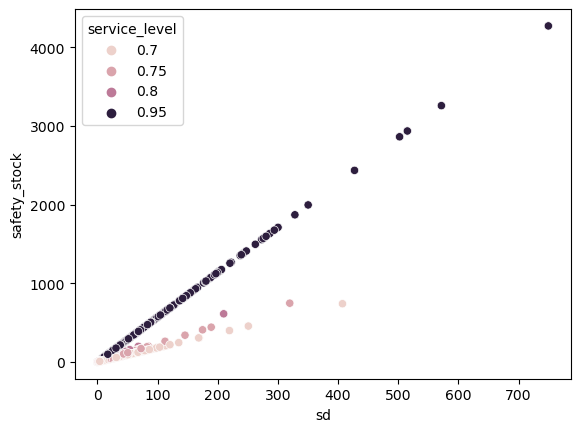

In [21]:
merged = merged[merged['safety_stock'] != max(merged['safety_stock'])]
sns.scatterplot(data = merged, x = 'sd', y = 'safety_stock', hue = 'service_level')

In [22]:
empty_df_lt = pd.DataFrame()
for i in range(rop_calculation.shape[0]):
    reorder_point_lt = inv.reorderpoint_leadtime_variability(dailydemand = int(rop_calculation.loc[i, 'average_sales']), 
                                                             dailystandarddeviation = rop_calculation.loc[i, 'sd'], 
                                                             leadtimein_days = 12, 
                                                             sd_leadtime_days = 2, 
                                                             csl = rop_calculation.loc[i, 'service_level'])
    as_data_lt = pd.DataFrame(reorder_point_lt, index = [0]) 
    as_data_lt['Description'] = rop_calculation['Description'][i]
    empty_df_lt = pd.concat([empty_df_lt, as_data_lt], axis = 0)

In [23]:
empty_df_lt

,demandleadtime,sigmadl,safteyfactor,reorder_point,Description
0,60,22.254982,0.524401,71.670524,4 PURPLE FLOCK DINNER CANDLES
0,372,197.212189,1.644854,696.385184,50'S CHRISTMAS GIFT BAG LARGE
0,348,257.732229,1.644854,771.931792,DOLLY GIRL BEAKER
0,96,42.993952,0.524401,118.546051,I LOVE LONDON MINI BACKPACK
0,12,NaN,0.524401,NaN,I LOVE LONDON MINI RUCKSACK
...,...,...,...,...,...
0,360,137.673888,1.644854,586.453394,ZINC T-LIGHT HOLDER STARS SMALL
0,12,NaN,0.524401,NaN,ZINC TOP 2 DOOR WOODEN SHELF
0,288,111.941138,1.644854,472.126787,ZINC WILLIE WINKIE CANDLE STICK
0,24,10.810048,0.524401,29.668795,ZINC WIRE KITCHEN ORGANISER


In [24]:
empty_df_lt_merged = pd.merge(rop_calculation, empty_df_lt, how = 'inner', on = 'Description')
empty_df_lt_merged['safety_stock'] = empty_df_lt_merged['reorder_point'] - empty_df_lt_merged['demandleadtime']
empty_df_lt_merged = empty_df_lt_merged[empty_df_lt_merged['safety_stock'] != empty_df_lt_merged['safety_stock'].max()]

<Axes: xlabel='sd', ylabel='safety_stock'>

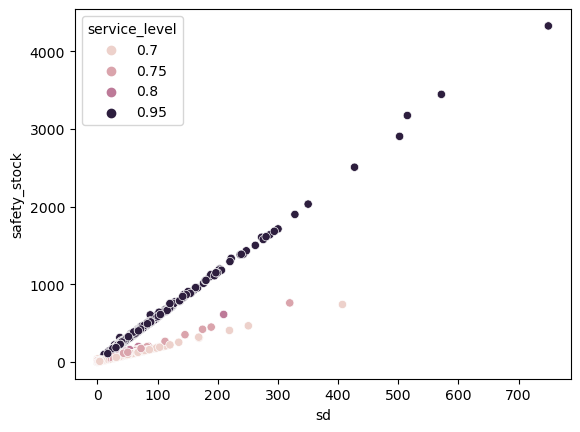

In [25]:
sns.scatterplot(data = empty_df_lt_merged, x = 'sd', y = 'safety_stock', hue = 'service_level')